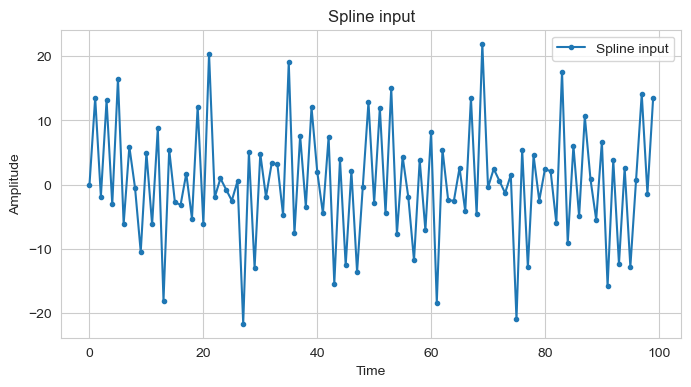

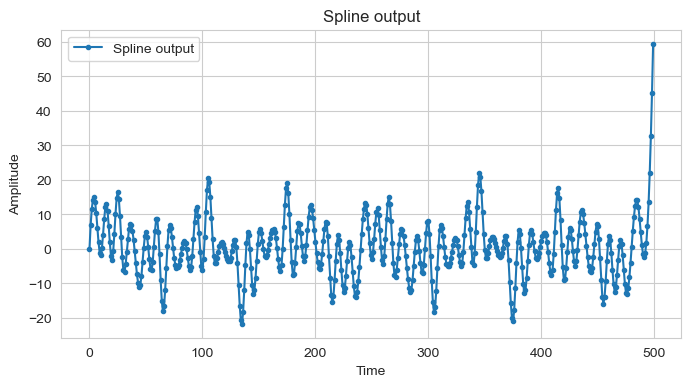

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style(style='whitegrid')

def plot_graph(input_array, title):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, marker='.', linewidth=0.5, label=title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_input_output(input_array, output_array):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label='Input')
    plt.plot(output_array, label='Output')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Input vs Output')
    plt.legend()
    plt.show()

y_in = np.loadtxt('spline_y_in.csv', delimiter=',', dtype=float)
y_out = np.loadtxt('spline_y_out.csv', delimiter=',', dtype=float)

plot_graph(y_in, "Spline input")
plot_graph(y_out, "Spline output")